<a href="https://colab.research.google.com/github/BxMild/Data-warehouse-2024/blob/main/Visualize_Data_Comparison_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd
import os
from datetime import datetime as dt
from datetime import time

In [23]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [24]:
path = '/content/drive/My Drive/data_viz_2024_DATA'

In [25]:
data = pd.read_csv(os.path.join(path,'barchart_data.csv'))
data = data.iloc[:,1:]
data.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/data_viz_2024_DATA/barchart_data.csv'

In [ ]:
# prompt: replace word Budget in the Price Category with รุ่นเริ่มต้น

data['Price Category'] = data['Price Category'].replace('Budget', 'รุ่นประหยัด')
data['Price Category'] = data['Price Category'].replace('Mid-range', 'รุ่นเริ่มต้น')
data['Price Category'] = data['Price Category'].replace('Premium', 'รุ่นเรือธง')


In [ ]:
data

## Bar chart (กราฟแท่ง) (กราฟผลไม้)

In [ ]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดของแต่ละ region ด้วยคำสั้ง plt.bar

import matplotlib.pyplot as plt

# Group data by region and sum sales
region_sales = data.groupby('Region')['Sales'].sum()

# Create the bar chart
plt.bar(region_sales.index, region_sales.values)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region')

# Show the plot
plt.show()


In [ ]:
region_sales

In [ ]:
region_sales.reset_index()['Region']

In [ ]:
region_sales.reset_index().Region

In [ ]:
region_sales.values

In [ ]:
region_sales.index

In [ ]:
# Group data by region and sum sales
region_sales = data.groupby(['Region','Quarter'])['Sales'].sum()
region_sales

In [ ]:
# prompt: สร้าง bar chart เปรียบเทียบปริมาณ sales ทั้งหมดในแต่ละ quarter ของแต่ละ region ด้วย stacked barchart

import matplotlib.pyplot as plt
# Group data by region and quarter, then sum sales
region_quarter_sales = data.groupby(['Region', 'Quarter'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_quarter_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Quarter')

# Show the plot
plt.show()


## plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

In [ ]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()


การแสดงตัวอักษรภาษาไทยในกราฟ matplotlib
https://medium.com/@kanyawee.work/%E0%B9%81%E0%B8%AA%E0%B8%94%E0%B8%87%E0%B8%9C%E0%B8%A5%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B9%84%E0%B8%97%E0%B8%A2%E0%B9%83%E0%B8%99%E0%B8%81%E0%B8%A3%E0%B8%B2%E0%B8%9F%E0%B8%82%E0%B8%AD%E0%B8%87-matplotlib-%E0%B8%9A%E0%B8%99-google-colab-37210d9a9f31


https://colab.research.google.com/drive/1sTdTZx_Cm51mc8OL_QHtehWyO4725sGl#scrollTo=Ak9SbVd5L7U8

In [ ]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

In [ ]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
# prompt: plot stacked barchart ของแต่ละ region โดยดูจาก contribution ของ Price Category

import matplotlib.pyplot as plt
# Group data by region and price category, then sum sales
region_price_category_sales = data.groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the stacked bar chart
region_price_category_sales.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category')

# Show the plot
plt.show()

## Plot stacked barchart ด้วย matplotlib

In [ ]:
region_brand_sales = data.groupby(['Region', 'Brand'])['Sales'].sum().unstack()
region_brand_sales

In [ ]:
region_brand_sales['BrandA'].values

In [ ]:
region_brand_sales.index

## plot ส่วนแรก

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
#ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 2

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width, bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')

ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

## plot ส่วนที่ 3

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(region_brand_sales.index, region_brand_sales['BrandA'].values, width, label='BrandA',color = '#fc9700')
ax.bar(region_brand_sales.index, region_brand_sales['BrandB'].values, width,
       bottom=region_brand_sales['BrandA'].values, label='BrandB',color = '#19038a')
ax.bar(region_brand_sales.index, region_brand_sales['BrandC'].values, width,
       bottom=region_brand_sales['BrandA'].values + region_brand_sales['BrandB'].values, label='BrandC',color = '#FF5733')


ax.set_ylabel('Total sales')
ax.set_xlabel('Region')
ax.set_title('Total sales by region and brand')
ax.legend()

plt.show()

# Grouped bar chart (เปรียบเทียบในกลุ่ม)

In [ ]:
# prompt: plot grouped bar chart ของแต่ละ region ในปี 2021 เพื่อเปรียบเทียบ sales ของแต่ละ price category ย้าย legend ออกไปข้างนอกกราฟ ปรับขนาด plot ให้เล็กลง 30%

import matplotlib.pyplot as plt
# Group data by region, year, and price category, then sum sales
region_year_price_category_sales = data[data['Year'] == 2021].groupby(['Region', 'Price Category'])['Sales'].sum().unstack()

# Create the grouped bar chart
ax = region_year_price_category_sales.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales by Region and Price Category in 2021')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()


## Plot grouped bar chart ของ หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง

In [ ]:
data_india = pd.read_csv(os.path.join(path,'IMDb Movies India.csv'), encoding='latin-1')
data_india.head()

In [ ]:
data_india = data_india.dropna(subset=['Rating','Duration','Genre'])
data_india = data_india[['Rating','Duration','Genre']]
data_india

In [ ]:
# prompt: แปลงค่าใน column duration เป็น int โดยลบ min ออกและ เปลี่ยนชนิดข้อมูลเป็น integer

# Remove " min" from the 'Duration' column and convert to integer
data_india['Duration'] = data_india['Duration'].str.replace(' min', '').astype(int)


In [ ]:
data_india.describe()

In [ ]:
# prompt: แยกตารางออกเป็นตารางย่อย 5 ตารางสำหรับ genre: drama, action, romance, horror, musical

# Create a dictionary to store the tables
genre_tables = {}

# Define the genres to extract
genres = ['Drama', 'Action', 'Romance', 'Horror', 'Musical']

# Iterate through the genres and create separate tables
for genre in genres:
  genre_tables[genre] = data_india[data_india['Genre'] == genre].copy()

# Access the tables using the genre as the key
# Example:
# drama_table = genre_tables['Drama']


In [ ]:
all_table = pd.concat(genre_tables.values())
all_table

In [ ]:
# prompt: แบ่ง duration ออกเป็น short, medium, long โดย short สั้นกว่า 60 medium 60-90 ที่เหลือ เป็น long

# Function to categorize duration
def categorize_duration(duration):
  if duration < 60:
    return 'short'
  elif 60 <= duration <= 90:
    return 'medium'
  else:
    return 'long'

# Apply the function to create a new column
all_table['Duration Category'] = all_table['Duration'].apply(categorize_duration)
all_table

In [ ]:
all_table.groupby(['Genre','Duration Category'])['Rating'].mean()

In [ ]:
india_bar_data = all_table.groupby(['Genre','Duration Category'])['Rating'].mean().unstack()

In [ ]:
india_bar_data

In [ ]:
ax = india_bar_data.plot(kind='bar', figsize=(8, 6), width=0.8)

# Add labels and title
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('หนังอินเดีย โดย แยกกลุ่มตามประเภทหนัง และเปรียบเทียบ rating จาก ความยาวของหนัง')

# Move legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Adjust plot size
plt.gcf().set_size_inches(plt.gcf().get_size_inches() * 0.7)

# Show the plot
plt.show()

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')
plt.title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน');

In [ ]:
plt.bar([1,2,3,4,5,6,7],[data[data['search_timestamp'].dt.dayofweek == 0].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 1].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 2].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 3].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 4].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 5].shape[0],
                         data[data['search_timestamp'].dt.dayofweek == 6].shape[0]
                         ],tick_label=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Days')
plt.ylabel('Number of Requests')

## Grouped bar chart

https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

แสดงปริมาณคนเข้าเว๊ปในแต่ละวัน โดยเปรียบเทียบช่วงเวลา 11:00-12:00 กับ 23:00-24:00

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)
& (data['search_timestamp'].dt.time < time(hour=12))
& (data['search_timestamp'].dt.time >= time(hour=11))].shape[0]  # monday 11:00-12:00

In [ ]:
b4lunch = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time < time(hour=12))&(data['search_timestamp'].dt.time >= time(hour=11))].shape[0]
                         ]

In [ ]:
b4lunch

In [ ]:
data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]

In [ ]:
b4midnight = [data[(data['search_timestamp'].dt.dayofweek == 0)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 1)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 2)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 3)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 4)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 5)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0],
           data[(data['search_timestamp'].dt.dayofweek == 6)&(data['search_timestamp'].dt.time >= time(hour=23))].shape[0]
                         ]
b4midnight

In [ ]:
labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

In [ ]:
import numpy as np

In [ ]:
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, b4lunch, width, label='lunch time',color = '#fc9700')
rects2 = ax.bar(x + width/2, b4midnight, width, label='midnight',color = '#19038a')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน เปรียบเทียบ 2 ช่วงเวลา')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend();

## Stacked bar chart

In [ ]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.bar(labels, b4midnight, width, bottom=b4lunch, label='before midnight',color = '#19038a')

ax.set_ylabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

In [ ]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.barh(labels, b4lunch, width, label='before lunch',color = '#fc9700')
ax.barh(labels, b4midnight, width, left=b4lunch, label='before midnight',color = '#19038a')

ax.set_xlabel('number of requests')
ax.set_title('ปริมาณคนเข้าใช้ Wongnai.com ในแต่ละวัน โดยคิดจาก 2 ช่วงเวลา')
ax.legend()

plt.show()

## [เช็คชื่อ] โดยให้วาด Bar chart ที่เปรียบเทียบปริมาณคนใช้งาน Wongnai.com สองช่วงเวลา โดยให้กราฟแสดงสัดส่วนของปริมาณคนใช้งานในแต่ละวันด้วย

## Histogram

## กราฟแสดงความถี่ของข้อมูล

ตัวอย่างข้อมูลที่ random มาจาก normal distribution ที่มี mean = 100  และ stdev = 15

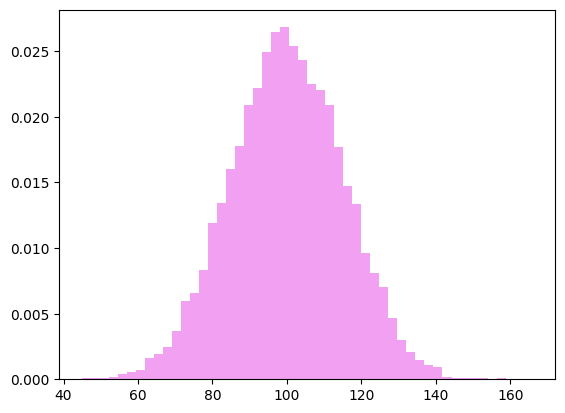

In [26]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(2024)

mu, sigma = 100, 15
X = mu + sigma * np.random.randn(10000)

plt.hist(X, 50, density = True, facecolor = 'violet', alpha = 0.75);

## ทดสอบกัยข้อมูลหนังอินเดีย

In [27]:
import os
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
Movie = '/content/drive/My Drive/Data_viz_2024/IMDb Movies India.csv'
#Added encoding = 'latin-1' to handle files not encoded in 'utf-8'
Movies_df = pd.read_csv(Movie, encoding = 'latin-1')
Movies_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


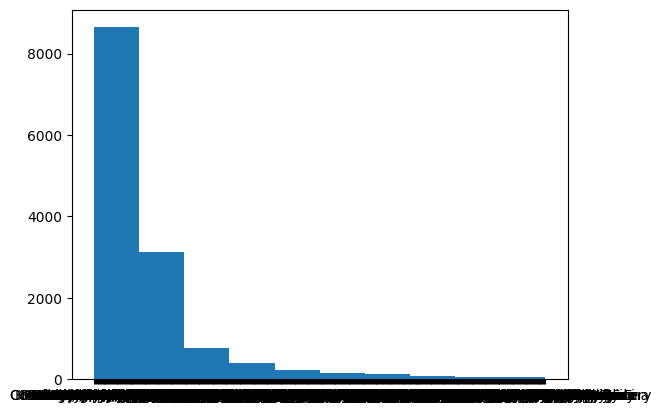

In [28]:
plt.hist(Movies_df.dropna(subset=['Genre'])['Genre']);

In [29]:
plt.hist(Movies_df.dropna(subset=['Director'])['Director'], bins=len(set(Movies_df.dropna(subset=['Genre'])['Genre'])));
plt.xticks(rotation = 'vertical');

Error in callback <function flush_figures at 0x7dd84b67a3b0> (for post_execute):


KeyboardInterrupt: 

In [31]:
# prompt: sprit value in column genre by ',' and make more column for each of those'

# Create a new DataFrame with split genres
new_df = Movies_df['Genre'].str.split(',', expand=True)
# Rename the columns
# Use list comprehension to create a list of column names
new_df.columns = ['Genre1','Genre2','Genre3'] + [str(i+1) for i in range(new_df.shape[1] - 3)]

# Concatenate the new columns with the original DataFrame
data_india = pd.concat([Movies_df, new_df], axis=1)
data_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre1,Genre2,Genre3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia,Drama,None,None
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,Drama,None,None
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana,Drama,Musical,None
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,Comedy,Romance,None
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali,Drama,None,None


In [32]:
# prompt: delete space in the value in genre1 genre2 genre3

# Remove leading and trailing spaces from 'Genre1', 'Genre2', and 'Genre3' columns
data_india['Genre1'] = data_india['Genre1'].str.strip(' ')
data_india['Genre2'] = data_india['Genre2'].str.strip(' ')
data_india['Genre3'] = data_india['Genre3'].str.strip(' ')


In [ ]:
allGenre = list(data_india['Genre1'])+list(data_india['Genre2'])+list(data_india['Genre3'])

In [ ]:
len(set(allGenre))

In [ ]:
allGenre[-20:]

In [ ]:
plt.hist(Movies_df.dropna(subset=['Director'])['Director'], bins=len(set(Movies_df.dropna(subset=[allGenre])[allGenre])));
plt.xticks(rotation = 'vertical');

# Quiz15 นับว่าพระเอกนางเอกคนไหนเล่นคู่กันมากที่สุด (พระเอก actor1 , นางเอก actor2)

In [33]:
# prompt: # prompt: Quis13 นับว่าพระเอกนางเอกคนไหนเล่นคู่กันกี่ครั้ง (พระเอก actor1 , นางเอก actor2)

# Create a new DataFrame with the actor pairs
actor_pairs = data_india[['Actor 1', 'Actor 2']]

# Group the data by actor pairs and count the occurrences
pair_counts = actor_pairs.groupby(['Actor 1', 'Actor 2']).size().reset_index(name='count')

# Display the result
print(pair_counts)


                Actor 1            Actor 2  count
0              A. Muthu   Aftab Shivdasani      1
1            A. Nairang    Mahendra Sandhu      1
2           A.K. Hangal        Aruna Irani      1
3           A.K. Hangal  Jean-Marie Lamour      1
4           A.K. Hangal     Shreeram Lagoo      1
...                 ...                ...    ...
11326           Zubeida               Hadi      1
11327           Zubeida        Shahu Modak      2
11328  Zuber Kamal Khan     Gehana Vasisth      1
11329       Zulfi Sayed    Masumeh Makhija      1
11330       Zulfi Sayed        Sonya Jehan      1

[11331 rows x 3 columns]


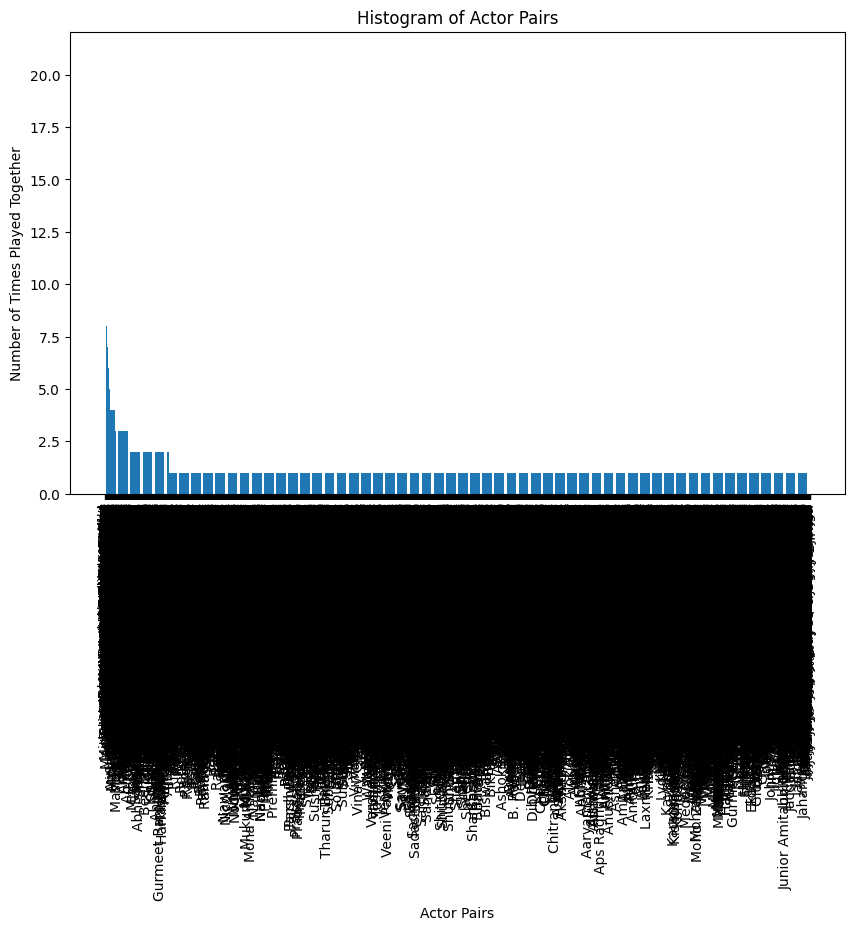

In [37]:
# prompt: นำมาทำ histogram โดยแสดงเป็นคู่ว่าแต่ละคู่เล่นด้วยกันกี่ครั้ง แกน x เป็นชื่อ แกน y เป็นจำนวนครั้งที่เล่นคู่กัน

# Sort the data by count in descending order
pair_counts_sorted = pair_counts.sort_values('count', ascending=False)

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(pair_counts_sorted['Actor 1'] + ' & ' + pair_counts_sorted['Actor 2'], pair_counts_sorted['count'])
plt.xlabel('Actor Pairs')
plt.ylabel('Number of Times Played Together')
plt.title('Histogram of Actor Pairs')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


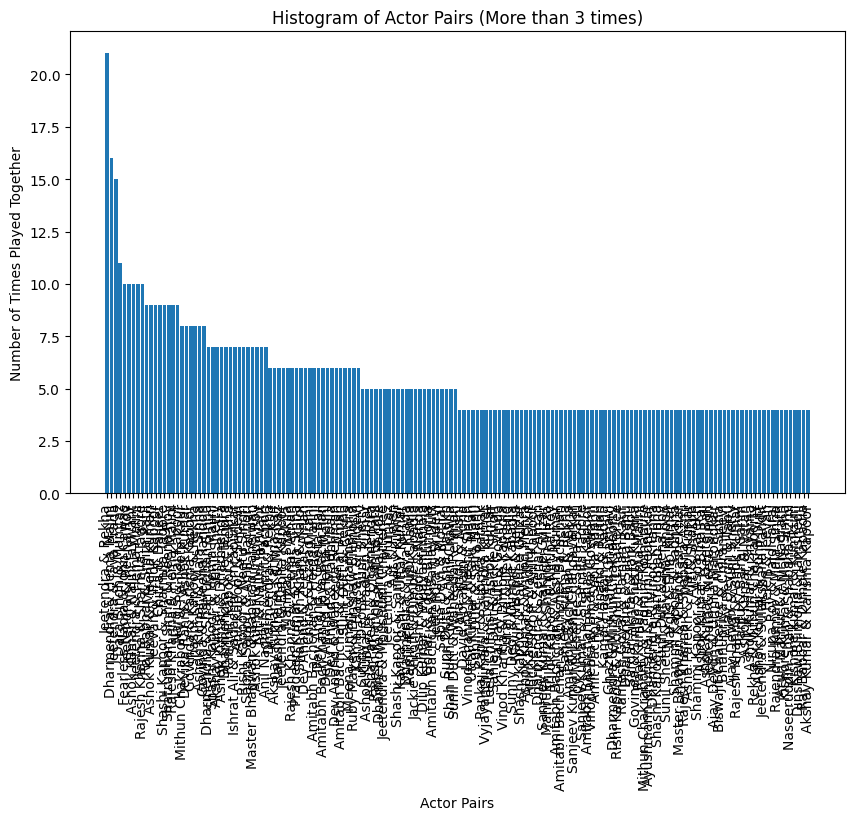

In [38]:
# prompt: ไม่เอาคนที่เล่นคู่กัน 1-3 ครั้ง

# Filter out pairs with counts less than or equal to 3
pair_counts_filtered = pair_counts_sorted[pair_counts_sorted['count'] > 3]

# Plot the histogram
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(pair_counts_filtered['Actor 1'] + ' & ' + pair_counts_filtered['Actor 2'], pair_counts_filtered['count'])
plt.xlabel('Actor Pairs')
plt.ylabel('Number of Times Played Together')
plt.title('Histogram of Actor Pairs (More than 3 times)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


ตัวอย่างข้อมูล wongnai.com

In [ ]:
import matplotlib
matplotlib.rcParams['figure.figsize']=[15,15]
output = plt.hist(list(data['number_of_result']),10,facecolor = 'red' ,alpha = 0.75)

แก้ไข แกน x ที่เรียงข้อมูลผิด

In [ ]:
data.dtypes

เรียกดู data type ของ ตัวแปร

In [ ]:
type(data['number_of_result'][0])

ตรวจสอบ data type ของตัวแปร

In [ ]:
type(data['number_of_result'][0]) == int

ตรวจสอบดูทุกๆค่าใน column 'number_of_result'

In [ ]:
# for x in data['number_of_result']:
#     if type(x) != int:
#         print(f'{x} -> {type(x)}')


In [ ]:
new_type = data['number_of_result'].astype('int32')

ลบ record ที่มีค่า ใน column 'number_of_result' เป็น number of result

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
data = data.drop(1000016)

In [ ]:
data[data['number_of_result']=='number_of_result']

In [ ]:
new_type = data['number_of_result'].astype('int32')

In [ ]:
output = plt.hist(new_type,100,facecolor = 'red' ,alpha = 0.75)

ลบ outlier

In [ ]:
new_type_nooutlier = new_type[new_type < 25]

In [ ]:
new_type.shape[0] - new_type_nooutlier.shape[0]

In [ ]:
matplotlib.rcParams['figure.figsize']=[8,8]
output = plt.hist(new_type_nooutlier,10,facecolor = 'red' ,alpha = 0.75)

Quiz 7 เปรียบเทียบความถี่ของแท่งที่มีค่ามากที่สุด กับ แท่งอื่นๆรวมกัน

In [ ]:
output

In [ ]:
output[0]

In [ ]:
output[0][-1]

In [ ]:
sum(output[0][:-1])

## Tree map

In [ ]:
!pip install squarify

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import squarify

In [ ]:
squarify.plot(output[0])

In [ ]:
squarify.plot(output[0],value=output[0])

In [ ]:
squarify.plot(output[0],value=output[0],norm_y=60)

## Radar Chart

In [ ]:
import numpy as np
import pandas as pd  #import pandas มาเพราะข้อมูลจะเกี่ยวกับตาราง
import matplotlib.pyplot as plt
from math import pi #import math มาเนื่องจากเกี่ยวกับวงกลมนำมาใช้เพื่อดึงค่าพาย

In [ ]:
data = {'client_id' : ['c1' , 'c2' , 'c3' , 'c4'],
         'cheese' : [2,5,4,3],
         'beer' : [2,1,3,5],
         'chicken' : [5,3,3,4],
        'bread' : [4,3,2,1],
       'coffee' : [2,3,5,3]}
df = pd.DataFrame.from_dict(data)
df

In [ ]:
categories = list(df.columns[1:])
categories

In [ ]:
values = df.mean().values.flatten().tolist()
values += values[:1] # repeat the first value to close the circular graph
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

ax.plot(angles, values, linewidth=1, linestyle='solid' , color = '#ea3033') #เส้นกราฟ
ax.fill(angles, values, 'lightpink', alpha=0.5) #พื้นที่

In [ ]:
angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
angles += angles[:1]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8),
                       subplot_kw=dict(polar=True))

plt.xticks(angles[:-1], categories, color='grey', size=12)
plt.yticks(np.arange(1, 6), ['1', '2', '3', '4', '5'],
           color='grey', size=12)

plt.ylim(0, 5)
ax.set_rlabel_position(30)

# part 1
val_c1 = df.loc[0].drop('client_id').values.flatten().tolist()
val_c1 += val_c1[:1]
ax.plot(angles, val_c1, linewidth=1,
        linestyle='solid', label='Client c1')
ax.fill(angles, val_c1, 'skyblue', alpha=0.4)

# part 2
val_c2=df.loc[1].drop('client_id').values.flatten().tolist()
val_c2 += val_c2[:1]
ax.plot(angles, val_c2, linewidth=1,
        linestyle='solid', label='Client c2')
ax.fill(angles, val_c2, 'lightpink', alpha=0.4)

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))